# Object Detection

In [99]:
import pandas as pd
import urllib
import urllib.request as tr
import os
import PIL
import shutil
import numpy as np
%matplotlib inline

## Create folder structure

In [100]:
basedir = r'biene_hummel'
dir_dict = {
    'download': os.path.join(basedir, 'download'),
    'train': os.path.join(basedir, 'train'),
    'test': os.path.join(basedir, 'test'),
    'valid': os.path.join(basedir, 'valid'),
    'train_bee': os.path.join(basedir, 'train', 'biene'),
    'train_bumble': os.path.join(basedir, 'train', 'hummel'),
    'test_bee': os.path.join(basedir, 'test', 'biene'),
    'test_bumble': os.path.join(basedir, 'test', 'hummel'),
    'valid_bee': os.path.join(basedir, 'valid', 'biene'),
    'valid_bumble': os.path.join(basedir, 'valid', 'hummel'),

}

# Erzeuge die Verzeichnisse (nur wenn sie nicht vorhanden sind)
for key in dir_dict:
    if os.path.exists(dir_dict[key])==False: 
        os.makedirs(dir_dict[key])

## Data retrieve

In [101]:
url = 'https://raw.githubusercontent.com/dionhagan/naive-bees/master/train_labels.csv'
urllib.request.urlretrieve(url, os.path.join(dir_dict['download'], 'train_labels.csv'))
df = pd.read_csv(os.path.join(dir_dict['download'], 'train_labels.csv'))
df.info()
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3969 entries, 0 to 3968
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      3969 non-null   int64  
 1   genus   3969 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.1 KB
     id  genus
0   520    1.0
1  3800    1.0
2  3289    1.0
3  2695    1.0
4  4922    1.0


## Reshape data

In [102]:
df = df.sort_values(['id'])
df['class'] = np.where(df['genus']==1, '_bumble', '_bee')
print(df.head(5))

      id  genus    class
2681   1    1.0  _bumble
1056   2    1.0  _bumble
2745   3    1.0  _bumble
2234   4    0.0     _bee
2645   5    0.0     _bee


In [103]:
for index, row in df.iterrows():
    fname = "{:.0f}.jpg".format(row['id'])
    url = 'https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/'+fname
    print(url)
    # urllib.request.urlretrieve(url, os.path.join(dir_dict['download'], fname))



https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/5.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/6.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/8.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/9.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/12.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/14.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/15.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/18.jpg
https://raw.githubuserco

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/601.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/602.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/603.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/605.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/606.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/608.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/609.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/610.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/611.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/613.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/614.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/616.jpg
http

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/845.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/847.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/848.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/850.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/851.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/853.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/855.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/858.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/859.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/860.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/861.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/862.jpg
http

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1048.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1049.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1050.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1051.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1052.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1053.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1054.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1055.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1056.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1057.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1060.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1235.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1236.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1237.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1239.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1241.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1244.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1245.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1246.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1247.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1248.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1249.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1365.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1366.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1367.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1368.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1369.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1370.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1371.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1372.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1373.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1374.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1375.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1645.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1646.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1647.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1648.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1649.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1650.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1651.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1652.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1653.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1654.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1656.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/1

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2224.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2225.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2227.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2228.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2229.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2230.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2231.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2232.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2234.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2235.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2236.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2702.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2704.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2705.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2710.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2711.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2712.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2713.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2715.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2719.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2720.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2721.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/2

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3060.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3061.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3062.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3063.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3064.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3065.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3066.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3067.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3068.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3069.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3070.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3369.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3370.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3371.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3372.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3373.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3374.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3375.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3376.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3377.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3378.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3379.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3505.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3506.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3507.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3508.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3509.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3510.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3512.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3514.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3515.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3517.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3518.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/3

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4386.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4387.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4388.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4389.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4390.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4391.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4394.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4396.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4398.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4399.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4400.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4

https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4530.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4531.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4533.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4534.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4535.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4536.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4537.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4538.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4539.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4540.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4541.jpg
https://raw.githubusercontent.com/dionhagan/naive-bees/master/images/train/4

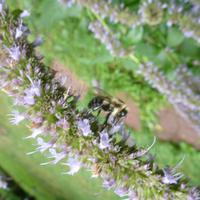

In [104]:
from IPython.display import Image
Image(os.path.join(dir_dict['download'], '8.jpg'))

In [105]:
for index, row in df.iterrows():
    fname ="{:.0f}.jpg".format(row['id'])
    
    classname = row['class']
    if row['id'] < 3000:
        dest_dir = os.path.join(dir_dict['train'+classname])
    elif row['id']<3500:
        dest_dir = os.path.join(dir_dict['test'+classname])
    else: 
        dest_dir = os.path.join(dir_dict['valid'+classname])

    src = os.path.join(dir_dict['download'], fname)
    dest = os.path.join(dest_dir, fname)
    shutil.copyfile(src, dest)


## CNN

In [106]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()






Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 21, 21, 128)      

## Create Test Train and Valid Data

In [107]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dir_dict['train'],
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    dir_dict['valid'],
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary'
)

Found 2399 images belonging to 2 classes.
Found 1176 images belonging to 2 classes.


In [108]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes)

print(class_weights)

[2.48858921 0.62571727]


/Users/thanh/anaconda3/envs/tf/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [109]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50,
class_weight=class_weights)

Epoch 1/30
 53/100 [==============>...............] - ETA: 3:17 - loss: 0.5057 - acc: 0.8057

KeyboardInterrupt: 